# Hibiscus

In [1]:
import pandas as pd
import seaborn as sns

from cluster import *

In [2]:
pd.Series(category_labels, index=list(range(len(category_labels))))

0       大叶木槿
1         黄槿
2        高红槿
3        樟叶槿
4       滇南芙蓉
5       旱地木槿
6     光柱旱地木槿
7       海滨木槿
8       吊灯扶桑
9         朱槿
10      重瓣朱槿
11      庐山芙蓉
12    长柄庐山芙蓉
13      美丽芙蓉
14    全叶美丽芙蓉
15      台湾芙蓉
16       木芙蓉
17        洋槿
18      贵州芙蓉
19        木槿
20      长苞木槿
21      短苞木槿
22    百花重瓣木槿
23    粉紫重瓣木槿
24     雅致木槿 
25     大花木槿 
26      牡丹木槿
27    紫花重瓣木槿
28    百花单瓣木槿
29      华木槿 
30     光籽木槿 
31      红秋葵 
32       芙蓉葵
33     云南芙蓉 
34       刺芙蓉
35    辐射刺芙蓉 
36     野西瓜苗 
37       玫瑰茄
38       大麻槿
39      草木槿 
40     外类群蜀葵
dtype: object

## Load Data

缺失值标记:

|origin symbol|current symbol|      context    |
|:-----------:|:------------:|:----------------|
|      ?      |      -1      |  Missing Value  |
|      N      |      -2      |   Not suitable  |
|             |      -3      |  Missing Value  |

属性区域分类

|part|       name     |      context    |
|:--:|:--------------:|:----------------|
|  A | **植物生活习性** |木本0/草本1        |
|  B | **叶片叶缘形状** |叶片形态/叶片具裂片/叶裂片形状/叶片质地/叶基部形态|
|  C |     **托片**    |托叶习性/托叶形状|
|  D |     **花萼**    |花萼宿存/萼形状/花萼膨大|
|  E |     **茎**      |茎直立/茎具刺|
|  F |     **花梗**    |小枝具毛/花梗具毛/花梗长度/花梗长度/花梗具节|
|  G |     **苞片**    |小苞片形状/小苞片长度/总苞合生/小苞片具附属物/小苞片颜色|
|  H |     **花**      |花序类型/花形态/花柱枝被毛/雄蕊伸出花外/花瓣边缘分裂情况/花瓣颜色/花瓣层数/花瓣长度|
|  I |     **果**      |果皮具毛/蒴果具喙/蒴果具翅/种子形状|
|  J |     **种子**     |种子具腺状乳突/种子被毛|


In [3]:
df = pd.read_csv(
    "hibiscus.csv",
    index_col=0,
    header=0,
    dtype='int16'
)

In [4]:
standarded_tree = [[[[[36, 33], [37, 39]], [[34, 35], 38]], [[[[19, 25, 21, 20, 28, 24], 26, 27], 22, 23], [[29, 30], 31]]], [[[[16, 15], 18], [12, 11]], [[[[14, 13], [6, 5]], 4], [[[[[10, 9], [32, 8]], 3], 17], [[[7, 1], 2], 0]]]], 40]

### 分类填充器

In [5]:
mci = MissingCategoryImputer(cols=df.columns.difference(["A1"]).to_list())
ici = InapplicableCategoryImputer(cols=df.columns.difference(["A1"]).to_list())

### 构建工作管线

In [6]:
imputer = Pipeline([('category missing', mci), ('category inapplicable', ici)])

## Anlysis Data

In [7]:
for name in df:
    count = df[name].value_counts()
    ind = count.index.to_list()
    val = count.to_list()
    lst = '\t  '.join([f"{k: d} ({v})" for k, v in zip(ind, val)])
    print(f"{name:<4s}: {lst}")

A1  :  0 (31)	   1 (10)
B2  :  1 (34)	   0 (7)
B3  :  1 (24)	   0 (17)
B4  :  0 (23)	   1 (14)	  -1 (4)
B5  :  0 (22)	   2 (16)	   1 (3)
B6  :  0 (17)	   1 (17)	  -1 (5)	   2 (2)
B7  :  2 (15)	   1 (13)	   0 (12)	  -1 (1)
C8  :  0 (23)	   1 (17)	  -1 (1)
C9  :  1 (34)	   0 (7)
D10 :  0 (40)	   1 (1)
D11 :  0 (31)	   1 (9)	   2 (1)
D12 :  1 (40)	   0 (1)
E13 :  1 (33)	   0 (8)
E14 :  0 (39)	   1 (2)
F15 :  1 (38)	   0 (3)
F16 :  0 (34)	   1 (7)
F17 :  0 (39)	   1 (2)
F18 :  1 (19)	   0 (18)	  -1 (4)
F19 :  0 (35)	   1 (5)	  -1 (1)
G20 :  0 (30)	   1 (11)
G21 :  0 (31)	   1 (9)	  -1 (1)
G22 :  1 (27)	   0 (14)
G23 :  0 (31)	   2 (7)	   1 (2)	  -2 (1)
G24 :  1 (25)	   2 (11)	   0 (4)	  -2 (1)
H25 :  0 (33)	   1 (5)	  -1 (2)	  -2 (1)
H26 :  1 (37)	   0 (3)	  -2 (1)
H27 :  0 (39)	   1 (1)	  -2 (1)
H28 :  1 (36)	  -1 (3)	   0 (2)
H29 :  0 (38)	   1 (3)
H30 :  1 (15)	   0 (11)	   3 (8)	   2 (7)
H31 :  0 (33)	   1 (6)	  -1 (2)
H32 :  0 (23)	   1 (17)	  -1 (1)
I33 :  0 (17)	   2 (10)	   1 (5)	 

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41 entries, 0 to 40
Data columns (total 38 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   A1      41 non-null     int16
 1   B2      41 non-null     int16
 2   B3      41 non-null     int16
 3   B4      41 non-null     int16
 4   B5      41 non-null     int16
 5   B6      41 non-null     int16
 6   B7      41 non-null     int16
 7   C8      41 non-null     int16
 8   C9      41 non-null     int16
 9   D10     41 non-null     int16
 10  D11     41 non-null     int16
 11  D12     41 non-null     int16
 12  E13     41 non-null     int16
 13  E14     41 non-null     int16
 14  F15     41 non-null     int16
 15  F16     41 non-null     int16
 16  F17     41 non-null     int16
 17  F18     41 non-null     int16
 18  F19     41 non-null     int16
 19  G20     41 non-null     int16
 20  G21     41 non-null     int16
 21  G22     41 non-null     int16
 22  G23     41 non-null     int16
 23  G24     41 non-nu

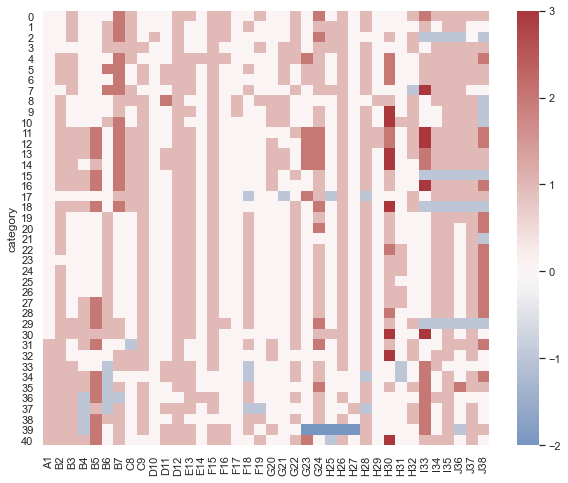

<Figure size 432x288 with 0 Axes>

In [9]:
show_heatmap(df, figsize=(10, 8))

## Clean Data

### 分类数据

#### 木本数据

In [10]:
# 筛选出木本数据
df_0 = df.loc[df['A1']==0, 'B2':]

In [11]:
# 删除缺失值样本
df_0_dropna = df_0[df_0 >= 0].dropna()

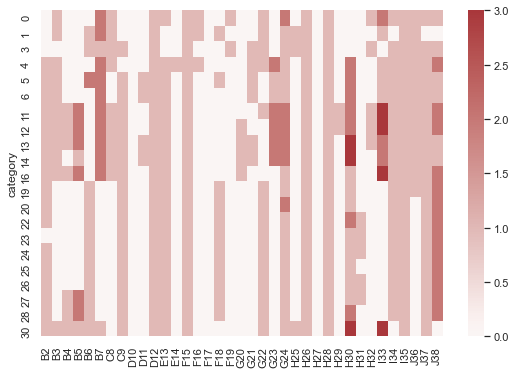

<Figure size 432x288 with 0 Axes>

In [12]:
show_heatmap(df_0_dropna, figsize=(9, 6))

#### 草本数据

In [13]:
# 筛选出木本数据
df_1 = df.loc[df['A1']==1, 'B2':]

In [14]:
# 删除缺失值样本
df_1_dropna = df_1[df_1 >= 0].dropna()

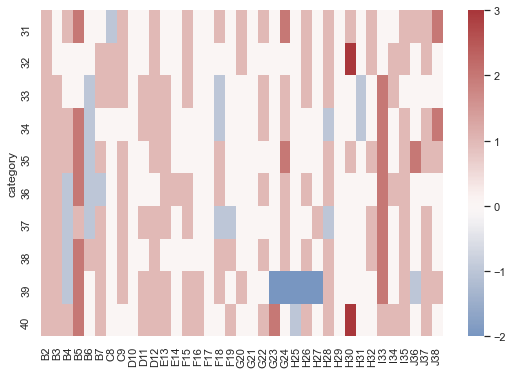

<Figure size 432x288 with 0 Axes>

In [15]:
show_heatmap(df_1, figsize=(9, 6))

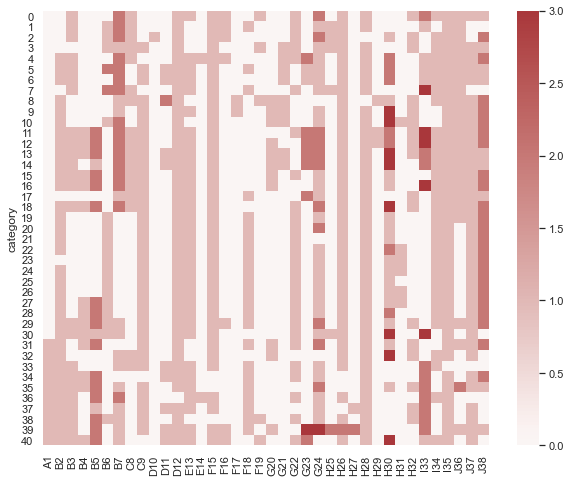

<Figure size 432x288 with 0 Axes>

In [16]:
# Note: 存在 NaN 值时, 索引后会自动转换为 float 型
df_imputer = imputer.fit_transform(df)
show_heatmap(df_imputer, figsize=(10, 8))

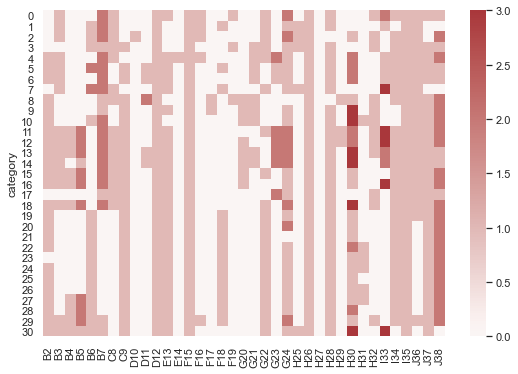

<Figure size 432x288 with 0 Axes>

In [17]:
# Note: 存在 NaN 值时, 索引后会自动转换为 float 型
df_0_imputer = imputer.fit_transform(df_0)
show_heatmap(df_0_imputer, figsize=(9, 6))

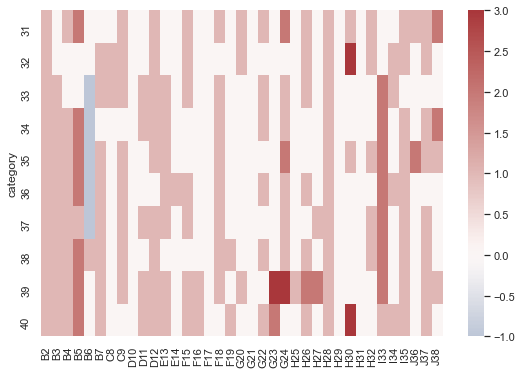

<Figure size 432x288 with 0 Axes>

In [18]:
# Note: 存在 NaN 值时, 索引后会自动转换为 float 型
df_1_imputer = imputer.fit_transform(df_1)
show_heatmap(df_1_imputer, figsize=(9, 6))

## Data Cluster

样本距离采用 Hamming 方法

聚类采用 average 方法:

$$d(u, v)=\sum_{ij}\frac{d(u[i], v[j])}{(|u| * |v|)}$$

### 木本

#### 删除缺失值

In [19]:
cluster_0_dropna = HibiscusCluster(
    df_0_dropna
)

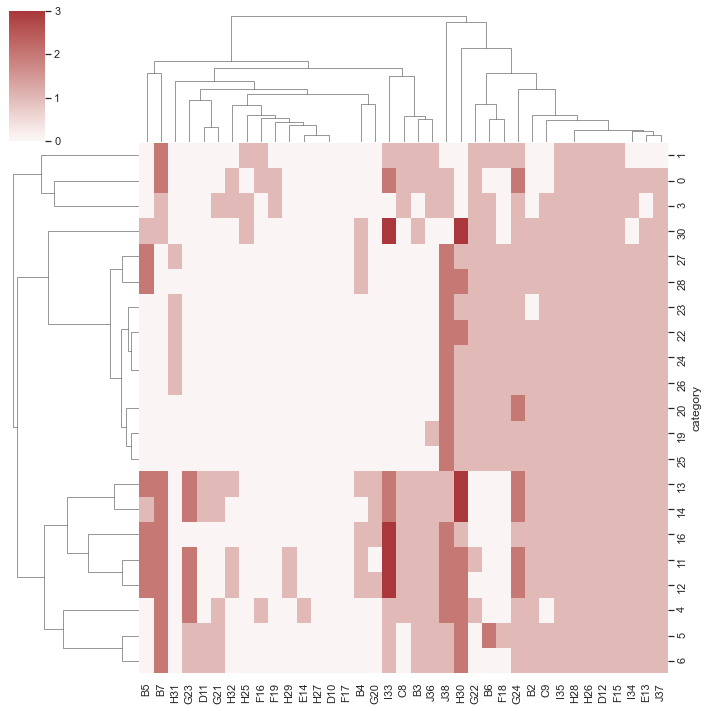

In [20]:
cluster_0_dropna.show_clustermap()

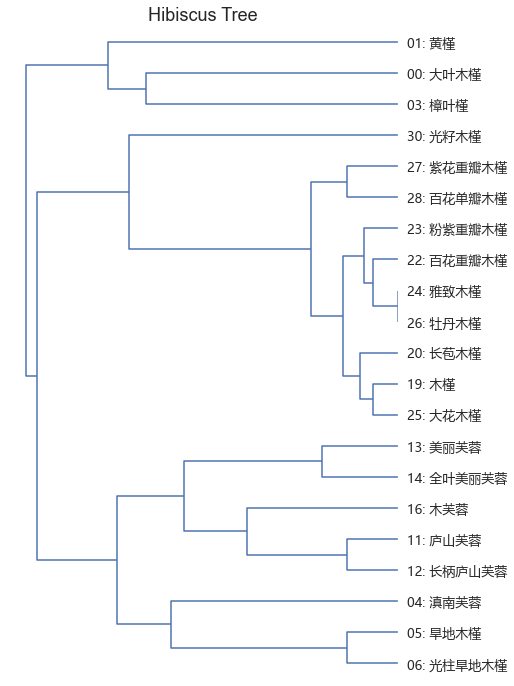

<Figure size 432x288 with 0 Axes>

In [21]:
cluster_0_dropna.show_dendrogram()

#### 填充缺失值

In [22]:
cluster_0_imputer = HibiscusCluster(
    df_0,
    imputer=imputer
)

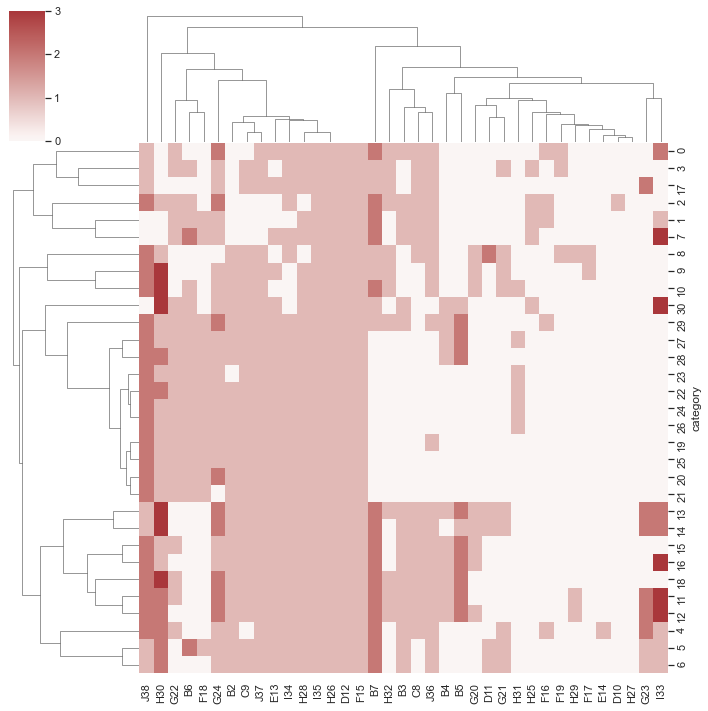

In [23]:
cluster_0_imputer.show_clustermap()

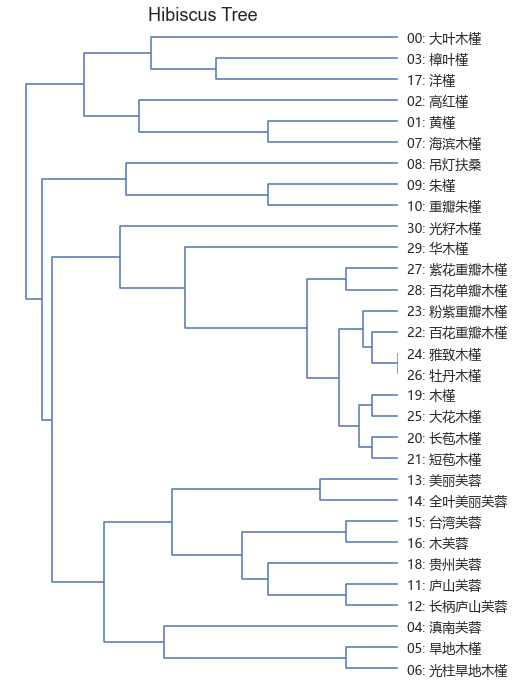

<Figure size 432x288 with 0 Axes>

In [24]:
cluster_0_imputer.show_dendrogram()

### 全部

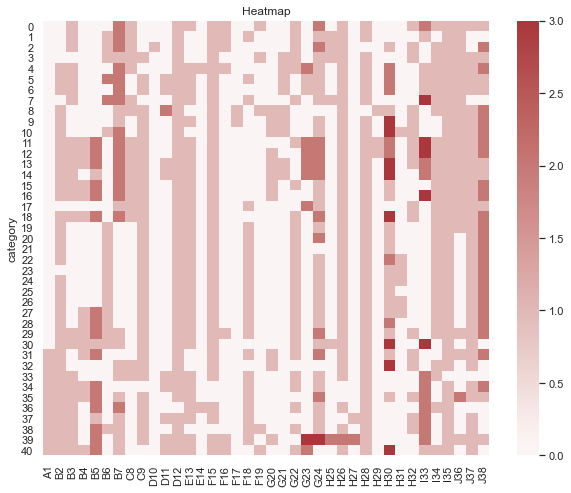

<Figure size 432x288 with 0 Axes>

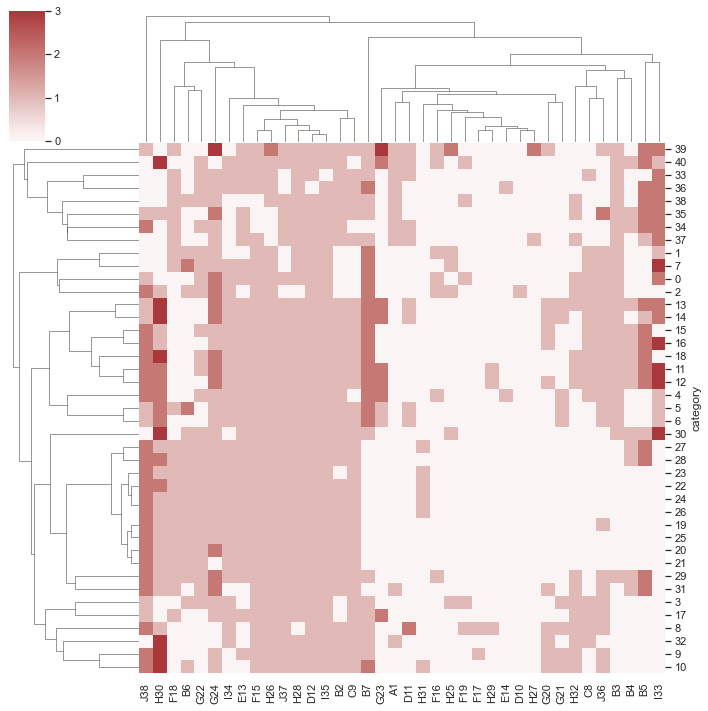

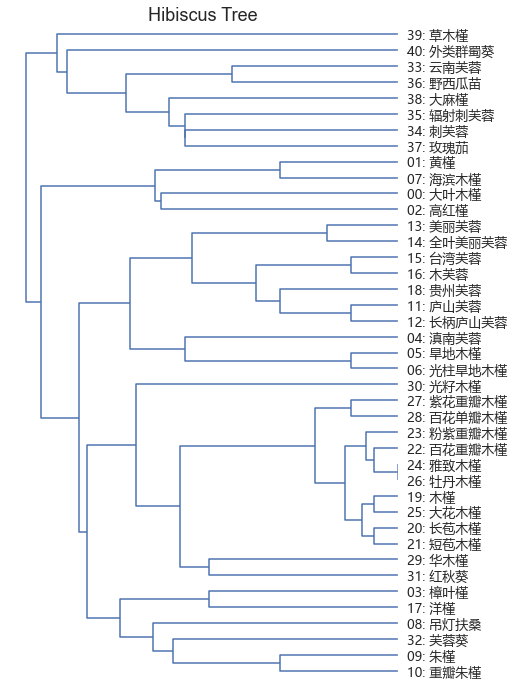

192021222324252627282931_0001020304050607080910111213141516171830323334353637383940
222426_0001020304050607080910111213141516171819202123252728293031323334353637383940
19202122232425262728293031_00010203040506070809101112131415161718323334353637383940
03080910171920212223242526272829303132_00010204050607111213141516183334353637383940
1314_000102030405060708091011121516171819202122232425262728293031323334353637383940
04050611121314151618_00010203070809101719202122232425262728293031323334353637383940
22232426_00010203040506070809101112131415161718192021252728293031323334353637383940
11121314151618_00010203040506070809101719202122232425262728293031323334353637383940
3336_000102030405060708091011121314151617181920212223242526272829303132343537383940
000102073334353637383940_0304050608091011121314151617181920212223242526272829303132
19202125_00010203040506070809101112131415161718222324262728293031323334353637383940
3334353637383940_00010203040506070809101112131415161718192021222324252627282

<Figure size 432x288 with 0 Axes>

In [25]:
cluster_average = HibiscusCluster(
    df,
    method='average',
    metric='hamming',
    imputer=imputer,
    name='df_imputer'
)

cluster_average.show_heatmap()
cluster_average.show_clustermap()
cluster_average.show_dendrogram()

print('\n'.join(cluster_average.split_tree))

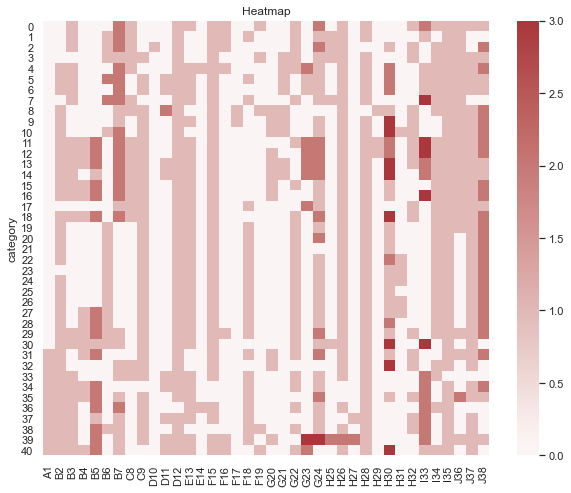

<Figure size 432x288 with 0 Axes>

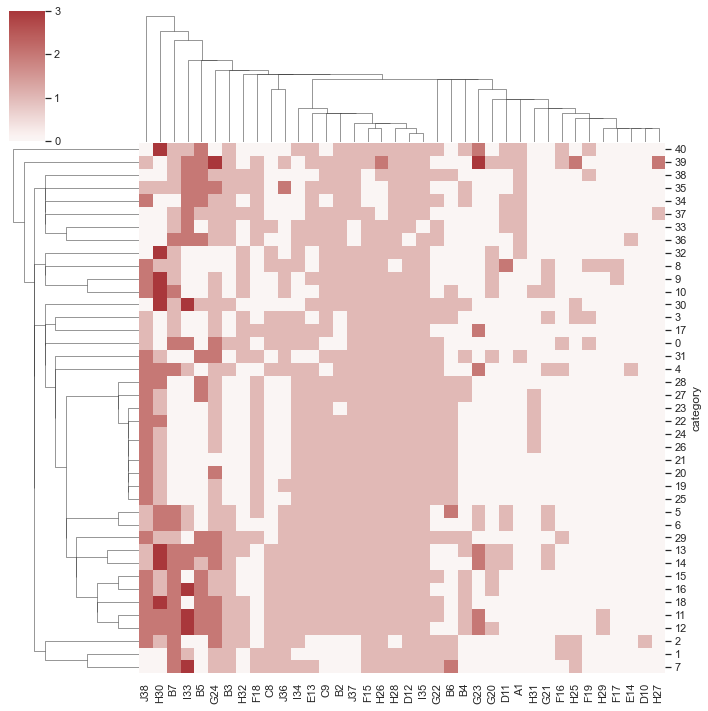

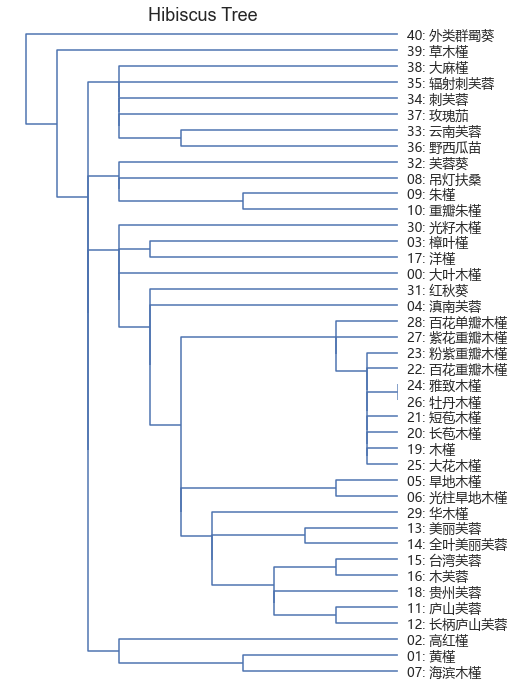

192025_0001020304050607080910111213141516171821222324262728293031323334353637383940
05061112131415161829_00010203040708091017192021222324252627283031323334353637383940
01020708091030323334353637383940_00030405061112131415161718192021222324252627282931
333637_0001020304050607080910111213141516171819202122232425262728293031323435383940
1314_000102030405060708091011121516171819202122232425262728293031323334353637383940
19202122242526_00010203040506070809101112131415161718232728293031323334353637383940
40_00010203040506070809101112131415161718192021222324252627282930313233343536373839
3334353637_000102030405060708091011121314151617181920212223242526272829303132383940
11121314151618_00010203040506070809101719202122232425262728293031323334353637383940
3940_000102030405060708091011121314151617181920212223242526272829303132333435363738
010203070809101730323334353637383940_0004050611121314151618192021222324252627282931
3336_00010203040506070809101112131415161718192021222324252627282930313234353

<Figure size 432x288 with 0 Axes>

In [26]:
cluster_single = HibiscusCluster(
    df,
    method='single',
    metric='hamming',
    imputer=imputer,
    name='df_imputer'
)

cluster_single.show_heatmap()
cluster_single.show_clustermap()
cluster_single.show_dendrogram()

print('\n'.join(cluster_single.split_tree))

In [27]:
cluster_average.rf_distance(cluster_single)

0.5131578947368421

#### 聚类对比评价

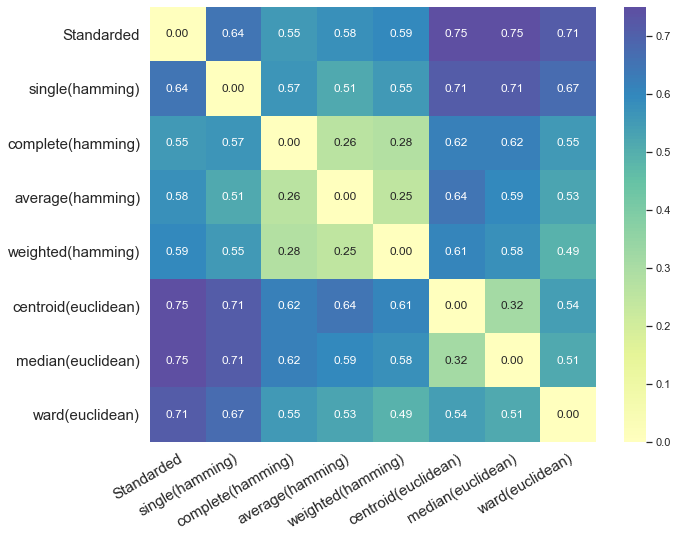

,Standarded,single(hamming),complete(hamming),average(hamming),weighted(hamming),centroid(euclidean),median(euclidean),ward(euclidean)
Standarded,0.000000,0.644737,0.552632,0.578947,0.592105,0.750000,0.750000,0.710526
single(hamming),0.644737,0.000000,0.565789,0.513158,0.552632,0.710526,0.710526,0.671053
complete(hamming),0.552632,0.565789,0.000000,0.263158,0.276316,0.618421,0.618421,0.552632
average(hamming),0.578947,0.513158,0.263158,0.000000,0.250000,0.644737,0.592105,0.526316
weighted(hamming),0.592105,0.552632,0.276316,0.250000,0.000000,0.605263,0.578947,0.486842
centroid(euclidean),0.750000,0.710526,0.618421,0.644737,0.605263,0.000000,0.315789,0.539474
median(euclidean),0.750000,0.710526,0.618421,0.592105,0.578947,0.315789,0.000000,0.513158
ward(euclidean),0.710526,0.671053,0.552632,0.526316,0.486842,0.539474,0.513158,0.000000


<Figure size 432x288 with 0 Axes>

In [28]:
cluster_all(
    data=df,
    imputer=imputer
)

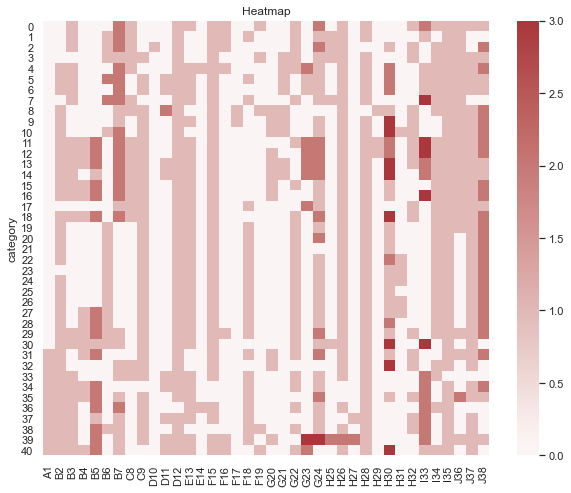

<Figure size 432x288 with 0 Axes>

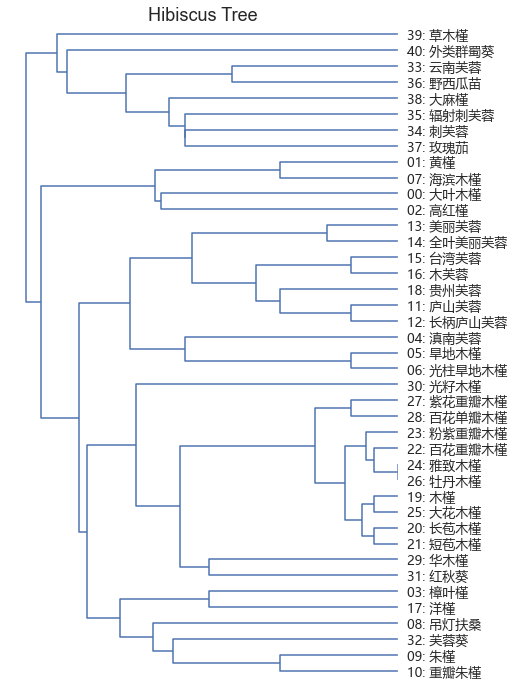

192021222324252627282931_0001020304050607080910111213141516171830323334353637383940
222426_0001020304050607080910111213141516171819202123252728293031323334353637383940
19202122232425262728293031_00010203040506070809101112131415161718323334353637383940
03080910171920212223242526272829303132_00010204050607111213141516183334353637383940
1314_000102030405060708091011121516171819202122232425262728293031323334353637383940
04050611121314151618_00010203070809101719202122232425262728293031323334353637383940
22232426_00010203040506070809101112131415161718192021252728293031323334353637383940
11121314151618_00010203040506070809101719202122232425262728293031323334353637383940
3336_000102030405060708091011121314151617181920212223242526272829303132343537383940
000102073334353637383940_0304050608091011121314151617181920212223242526272829303132
19202125_00010203040506070809101112131415161718222324262728293031323334353637383940
3334353637383940_00010203040506070809101112131415161718192021222324252627282

<Figure size 432x288 with 0 Axes>

In [29]:
cluster_average_weight = HibiscusCluster(
    df,
    method='average',
    metric='hamming',
    weight=np.ones(38),
    imputer=imputer,
    name='df_imputer'
)

cluster_average_weight.show_heatmap()
cluster_average_weight.show_dendrogram()

print('\n'.join(cluster_average_weight.split_tree))

In [30]:
standarded_split_tree = split_list_tree(standarded_tree)
cluster_average_weight.rf_distance(standarded_split_tree)

0.5789473684210527

In [31]:
def f(x):
    print("*", end='')
    cluster_weight = HibiscusCluster(
        df,
        method='average',
        metric='hamming',
        weight=x,
        imputer=imputer,
        name='df_imputer'
    )
    rate = cluster_weight.rf_distance(standarded_split_tree)
    return rate

In [32]:
from scipy.optimize import minimize

In [33]:
minimize(f, x0=np.ones(38))

*********************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************************

      fun: 0.5263157894736842
 hess_inv: array([[1, 0, 0, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 1, 0, 0],
       [0, 0, 0, ..., 0, 1, 0],
       [0, 0, 0, ..., 0, 0, 1]])
      jac: array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0.])
  message: 'Optimization terminated successfully.'
     nfev: 429
      nit: 1
     njev: 11
   status: 0
  success: True
        x: array([1.        , 1.        , 1.        , 1.00001312, 1.00001312,
       0.99998031, 1.        , 1.        , 1.        , 0.99999344,
       1.        , 1.        , 0.99998031, 1.        , 1.00001312,
       1.        , 1.        , 1.        , 0.99998031, 1.        ,
       1.        , 1.        , 1.00001312, 1.        , 0.99999344,
       1.        , 1.00001312, 0.99999344, 1.00001312, 0.99999344,
       1.        , 1.        , 1.0

In [34]:
standarded_split_tree = split_list_tree(standarded_tree)

In [35]:
cluster_average.rf_distance(standarded_split_tree)

0.5789473684210527

In [36]:
cluster_single.rf_distance(standarded_split_tree)

0.6447368421052632

In [37]:
standarded_tree

[[[[[36, 33], [37, 39]], [[34, 35], 38]],
  [[[[19, 25, 21, 20, 28, 24], 26, 27], 22, 23], [[29, 30], 31]]],
 [[[[16, 15], 18], [12, 11]],
  [[[[14, 13], [6, 5]], 4],
   [[[[[10, 9], [32, 8]], 3], 17], [[[7, 1], 2], 0]]]],
 40]

In [38]:
class Node(object):
    def __init__(self, name, child=None, depth=1):
        self.name = name
        self.depth = depth
        self.child = child
        
    def __repr__(self):
        return f"Node: <name: {self.name}, depth: {self.depth}>"

In [39]:
def create_tree(child, depth=1):
    child_list = []
    for item in child:
        if isinstance(item, int):
            child_list.append(Node(item, None, depth=2))
        elif isinstance(item, list):
            child_list.append(create_tree(item, depth+1))
    node = Node(999, child_list, depth=depth)
    return node

In [40]:
a = create_tree(standarded_tree)

In [41]:
a

Node: <name: 999, depth: 1>

In [42]:
a.child

[Node: <name: 999, depth: 2>,
 Node: <name: 999, depth: 2>,
 Node: <name: 40, depth: 2>]